In [11]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read CSV
df = pd.read_csv("Resources/cleaned_alzheimers_disease_data.csv")
df.head()      

,Unnamed: 0,PatientID,Age,Gender,Ethnicity,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,FunctionalAssessment,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,0,4751,73,Male,Caucasian,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,6.518877,0,0,0,0,0,1,0,0
1,1,4752,89,Male,Caucasian,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,7.118696,0,0,0,0,0,0,1,0
2,2,4753,73,Male,Other,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,5.895077,0,0,0,1,0,1,0,0
3,3,4754,74,Female,Caucasian,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,8.965106,0,1,0,0,0,0,0,0
4,4,4755,89,Male,Caucasian,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,6.045039,0,0,0,0,1,1,0,0


In [4]:
print(df.dtypes)

Unnamed: 0                     int64
PatientID                      int64
Age                            int64
Gender                        object
Ethnicity                     object
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
Confusion                      int64
Disorientation                 int64
PersonalityChanges             int64
DifficultyCompletingTasks      int64
Forgetfulness                  int64
Diagnosis                      int64
dtype: object


In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode 'Gender' column (or any binary categorical column)
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Ethnicity'] = label_encoder.fit_transform(df['Ethnicity'])


In [6]:
# Features (X) and Target (y)
X = df.drop(columns=['Diagnosis'])  # Exclude the target column
y = df['Diagnosis']  # Target variable

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
df.head()

,Unnamed: 0,PatientID,Age,Gender,Ethnicity,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,FunctionalAssessment,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,0,4751,73,1,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,6.518877,0,0,0,0,0,1,0,0
1,1,4752,89,1,2,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,7.118696,0,0,0,0,0,0,1,0
2,2,4753,73,1,3,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,5.895077,0,0,0,1,0,1,0,0
3,3,4754,74,0,2,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,8.965106,0,1,0,0,0,0,0,0
4,4,4755,89,1,2,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,6.045039,0,0,0,0,1,1,0,0


In [15]:
# Define Preprocessing Pipelines

# Define preprocessing for numeric features 
numeric_features = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FunctionalAssessment'] # You can also do this in a loop, select the numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for the binary features 
binary_features = ['Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges','DifficultyCompletingTasks','Forgetfulness']
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=pd.NA)),
    ('label', OrdinalEncoder())])  # Label encode for binary feature

# Define preprocessing for categorical features  
categorical_features = ['Gender', 'Ethnicity']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=pd.NA)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('binary', binary_transformer, binary_features),
        ('cat', categorical_transformer, categorical_features)])

In [16]:
# Use only preprocessing pipeline to transform the data
preprocessed_X_train = preprocessor.fit_transform(df)

# Convert preprocessed data to a DataFrame
# Get the feature names after one-hot encoding
encoded_feature_names = (numeric_features + binary_features +
                         list(preprocessor.transformers_[2][1]['onehot'].get_feature_names_out(categorical_features)))

df_final = pd.DataFrame(preprocessed_X_train, columns=encoded_feature_names)
df_final["Diagnosis"] = df.Diagnosis
df_final.head()

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FunctionalAssessment,Smoking,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Gender_0,Gender_1,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,Diagnosis
0,-0.212368,-0.655225,0.565923,0.492525,-1.253593,1.119918,0.497506,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,1.567757,-0.114751,-0.954895,0.945093,-1.538442,0.056836,0.704907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
2,-0.212368,-1.366428,1.653006,1.023896,-1.088855,1.487380,0.281813,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
3,-0.101111,0.851625,0.376930,1.227995,0.839804,0.760833,1.343346,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
4,1.567757,-0.961607,1.461793,0.486696,-1.443293,-0.824566,0.333665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [17]:
corrs = df_final.corr()
corrs

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FunctionalAssessment,Smoking,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Gender_0,Gender_1,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,Diagnosis
Age,1.000000,-0.015677,0.007323,-0.010249,-0.023386,0.049139,0.005508,0.020060,-0.018784,-0.015284,-0.005708,-0.008752,-0.040337,0.003954,0.012343,0.038973,0.009002,0.027523,-0.009470,0.013900,-0.019279,0.028708,-0.028708,-0.036095,0.030738,-0.004897,0.027184,-0.005488
BMI,-0.015677,1.000000,-0.008997,0.000742,0.019922,-0.005975,-0.030501,0.020437,0.006446,-0.005467,-0.008980,-0.012507,0.016288,0.004928,0.029293,0.035276,-0.015859,-0.031840,-0.015901,-0.039400,0.071131,0.005928,-0.005928,-0.003128,-0.030440,0.009966,0.017964,0.026343
AlcoholConsumption,0.007323,-0.008997,1.000000,0.021696,0.020117,-0.003873,-0.016483,0.008363,-0.003707,-0.023632,0.000073,0.008867,-0.008301,-0.006010,-0.029418,0.013657,-0.032798,0.015521,0.019117,-0.002712,-0.024121,0.004330,-0.004330,-0.007820,0.025044,-0.006326,-0.003612,-0.007618
PhysicalActivity,-0.010249,0.000742,0.021696,1.000000,0.011085,-0.001823,-0.002419,0.010760,-0.014106,0.003976,0.029880,-0.013533,0.025780,0.022081,0.008709,-0.014253,-0.009397,-0.020407,-0.013629,0.031169,0.009837,-0.035795,0.035795,0.016916,-0.005753,-0.022087,0.018927,0.005945
DietQuality,-0.023386,0.019922,0.020117,0.011085,1.000000,0.051295,-0.009700,-0.002048,-0.011261,-0.015220,0.009192,-0.002516,-0.008163,-0.043628,0.012537,-0.014033,0.002628,-0.026271,0.029087,0.045737,0.006175,0.010942,-0.010942,-0.010102,-0.020999,0.022092,-0.001816,0.008506
SleepQuality,0.049139,-0.005975,-0.003873,-0.001823,0.051295,1.000000,0.029589,-0.001145,0.014801,0.002112,0.023987,-0.022996,-0.004546,0.038668,-0.016807,-0.019899,0.013508,0.019467,-0.016892,0.011237,0.002930,0.007310,-0.007310,0.000051,0.027841,-0.025408,0.014305,-0.056548
FunctionalAssessment,0.005508,-0.030501,-0.016483,-0.002419,-0.009700,0.029589,1.000000,-0.031879,-0.004650,-0.041270,0.043548,0.019733,0.034655,-0.028332,0.002320,-0.021941,-0.023118,-0.007193,0.024260,0.019805,0.019387,0.033324,-0.033324,-0.013070,0.018718,0.006684,-0.011617,-0.364898
Smoking,0.020060,0.020437,0.008363,0.010760,-0.002048,-0.001145,-0.031879,1.000000,-0.045811,0.027955,-0.035810,-0.039363,-0.019178,-0.021124,0.020339,-0.014763,0.004498,-0.028403,-0.009977,0.001741,0.018011,0.016650,-0.016650,-0.025115,-0.018952,-0.003579,0.059109,-0.004865
FamilyHistoryAlzheimers,-0.018784,0.006446,-0.003707,-0.014106,-0.011261,0.014801,-0.004650,-0.045811,1.000000,0.020783,-0.023106,0.000796,-0.019184,0.012920,-0.028348,-0.023558,0.017976,0.035963,0.006839,0.008787,0.022339,0.018421,-0.018421,0.019678,-0.007117,-0.024716,0.020826,-0.032900
CardiovascularDisease,-0.015284,-0.005467,-0.023632,0.003976,-0.015220,0.002112,-0.041270,0.027955,0.020783,1.000000,-0.010134,0.006043,0.001342,-0.011760,0.031061,-0.016803,0.017658,0.025237,-0.032343,0.024684,0.010170,0.034577,-0.034577,-0.014571,0.037267,-0.000959,-0.015300,0.031490


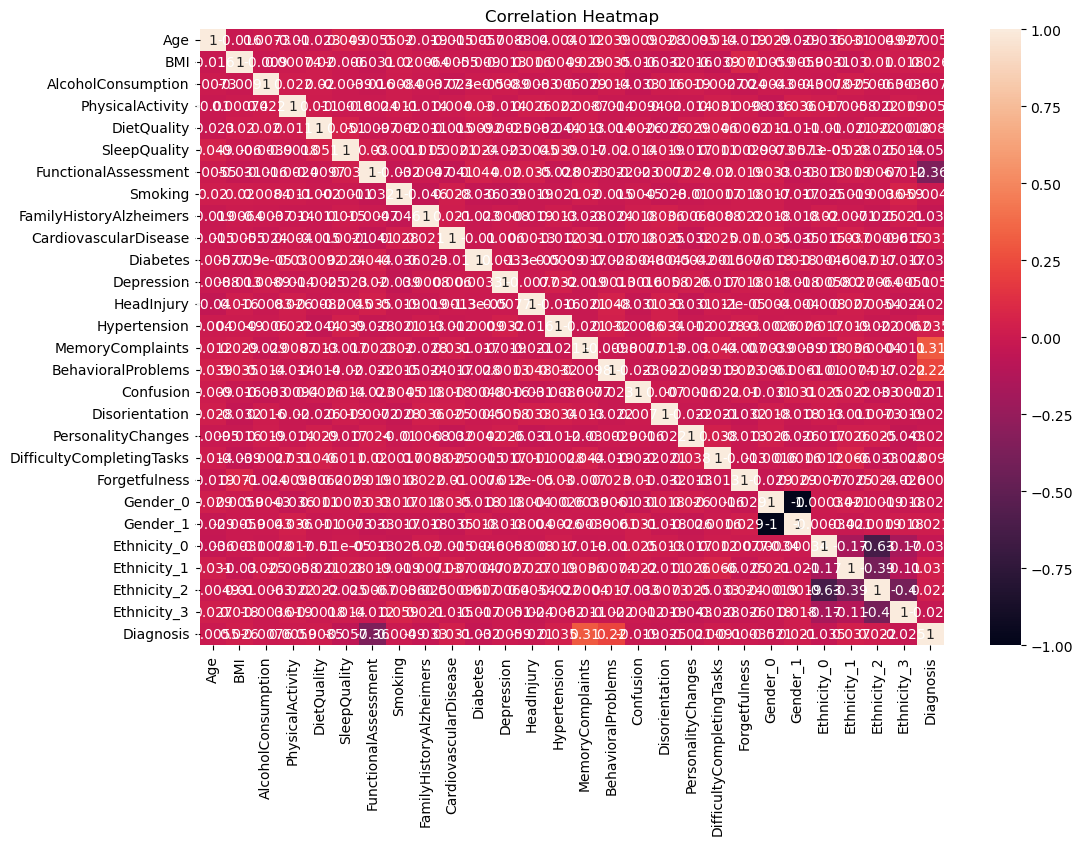

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(corrs, annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [20]:
abs(corrs.Diagnosis).sort_values(ascending=False)

Diagnosis                    1.000000
FunctionalAssessment         0.364898
MemoryComplaints             0.306742
BehavioralProblems           0.224350
SleepQuality                 0.056548
Ethnicity_1                  0.036854
Hypertension                 0.035080
Ethnicity_0                  0.034712
FamilyHistoryAlzheimers      0.032900
Diabetes                     0.031508
CardiovascularDisease        0.031490
BMI                          0.026343
Ethnicity_3                  0.024926
Disorientation               0.024648
Ethnicity_2                  0.021870
HeadInjury                   0.021411
Gender_0                     0.020975
Gender_1                     0.020975
PersonalityChanges           0.020627
Confusion                    0.019186
DifficultyCompletingTasks    0.009069
DietQuality                  0.008506
AlcoholConsumption           0.007618
PhysicalActivity             0.005945
Depression                   0.005893
Age                          0.005488
Smoking     

In [ ]:
#Not Scaled
#No Collinearity

In [ ]:
Machine Learning

In [28]:
# Step 1: Get the Data
X = df.drop(columns=["Diagnosis"])
y = df.Diagnosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1, stratify=y) # stratify ensures same % of the target classes in the train/test

print(X.shape)
print(X_train.shape)
print(X_test.shape)

(2149, 25)
(1289, 25)
(860, 25)


Logistic Regression

Logistic Regression Accuracy: 0.6965116279069767
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.85      0.78       556
           1       0.60      0.42      0.49       304

    accuracy                           0.70       860
   macro avg       0.66      0.63      0.64       860
weighted avg       0.68      0.70      0.68       860



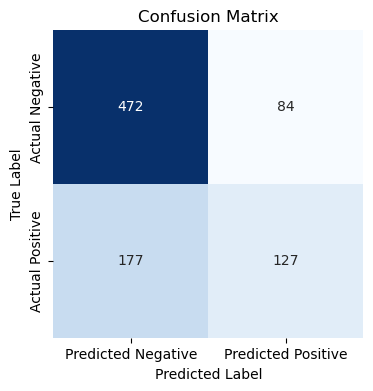

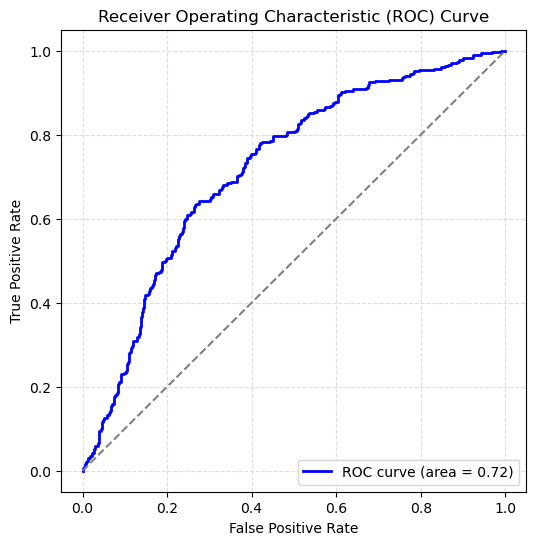

In [29]:
# Initialize and train the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))

#Generate the predictions and evaluate the confusion matrix
test_cf = confusion_matrix(y_test, y_pred_logreg)

# Visualize the Confusion Matrix
plt.figure(figsize=(4, 4))
sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Step 2: Calculate the ROC curve and AUC
y_pred_prob = logreg.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
test_auc = roc_auc_score(y_test, y_pred_prob)

# Step 3: Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
plt.legend(loc="lower right")
plt.show()

Decision Trees

Decision Tree Accuracy: 0.7
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77       556
           1       0.58      0.57      0.57       304

    accuracy                           0.70       860
   macro avg       0.67      0.67      0.67       860
weighted avg       0.70      0.70      0.70       860



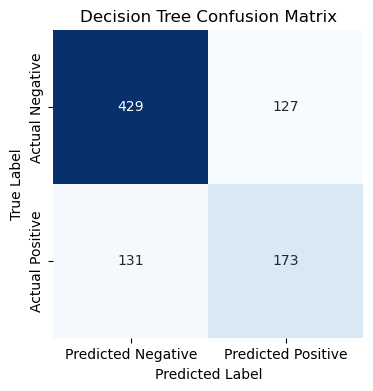

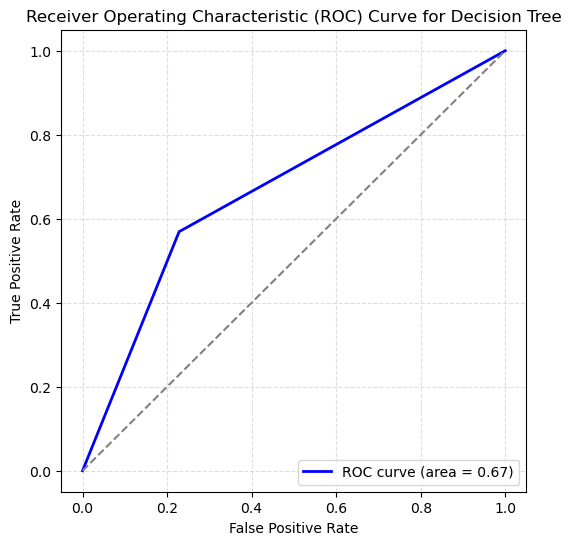

In [30]:
# Initialize and train the model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

#Generate the Confusion Matrix
test_cf_dt = confusion_matrix(y_test, y_pred_dt)

# Visualize the Confusion Matrix
plt.figure(figsize=(4, 4))
sns.heatmap(test_cf_dt, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Step 2: Calculate the ROC curve and AUC
y_pred_prob_dt = dt.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
test_auc_dt = roc_auc_score(y_test, y_pred_prob_dt)

# Step 3: Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'ROC curve (area = {test_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
plt.legend(loc="lower right")
plt.show()

Random Forest

Random Forest Accuracy: 0.7244186046511628
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.83      0.80       556
           1       0.63      0.53      0.58       304

    accuracy                           0.72       860
   macro avg       0.70      0.68      0.69       860
weighted avg       0.72      0.72      0.72       860



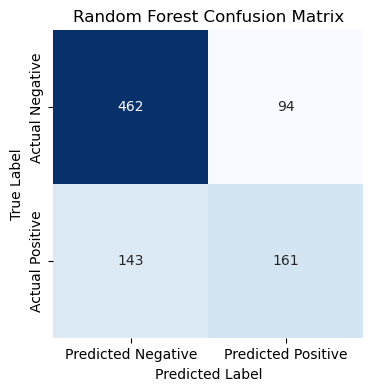

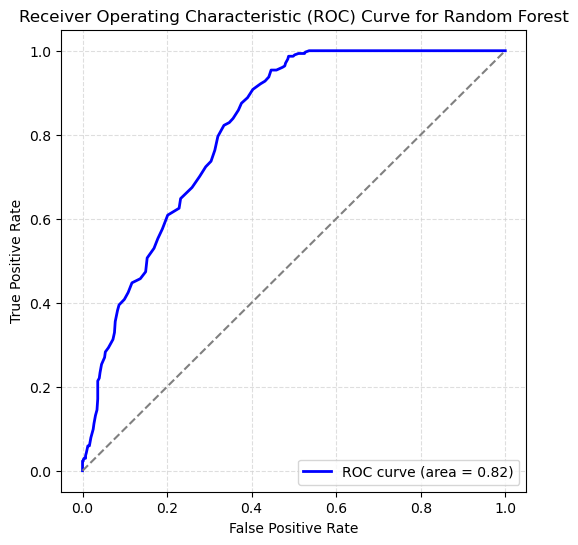

In [31]:
# Initialize and train the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

#Generate the Confusion Matrix
test_cf_rf = confusion_matrix(y_test, y_pred_rf)

# Visualize the Confusion Matrix
plt.figure(figsize=(4, 4))
sns.heatmap(test_cf_rf, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Step 2: Calculate the ROC curve and AUC
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
test_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

# Step 3: Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC curve (area = {test_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
plt.legend(loc="lower right")
plt.show()

In [32]:
from xgboost import XGBClassifier

# Create and train the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [33]:
# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.7023255813953488
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.78      0.77       556
           1       0.58      0.57      0.57       304

    accuracy                           0.70       860
   macro avg       0.67      0.67      0.67       860
weighted avg       0.70      0.70      0.70       860



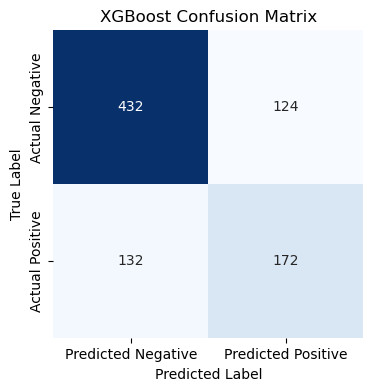

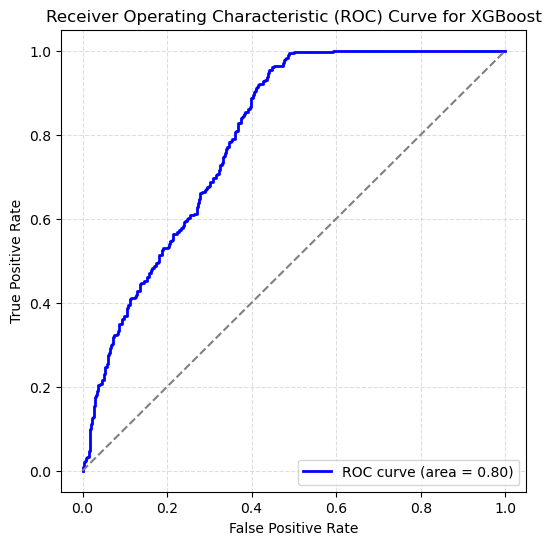

In [34]:
#visualization
#Generate the Confusion Matrix
test_cf_xgb = confusion_matrix(y_test, y_pred_xgb)
# Visualize the Confusion Matrix
plt.figure(figsize=(4, 4))
sns.heatmap(test_cf_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Step 2: Calculate the ROC curve and AUC
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)
test_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
# Step 3: Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'ROC curve (area = {test_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
plt.legend(loc="lower right")
plt.show()